In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shantanudhakadd/bank-customer-churn-prediction/versions/1


In [5]:

train_file_path = os.path.join(path, "Churn_Modelling.csv")
df = pd.read_csv(train_file_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [8]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df,drop_first = True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [14]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<Axes: xlabel='Exited', ylabel='count'>

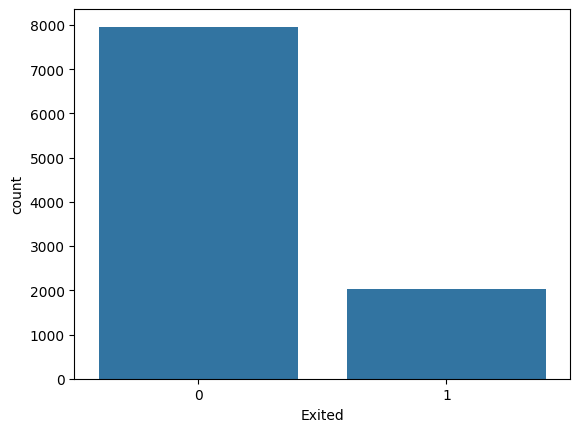

In [17]:
sns.countplot(x='Exited', data=df)

In [20]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [21]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()

,count
Exited,
1,7963
0,7963


<Axes: xlabel='Exited', ylabel='count'>

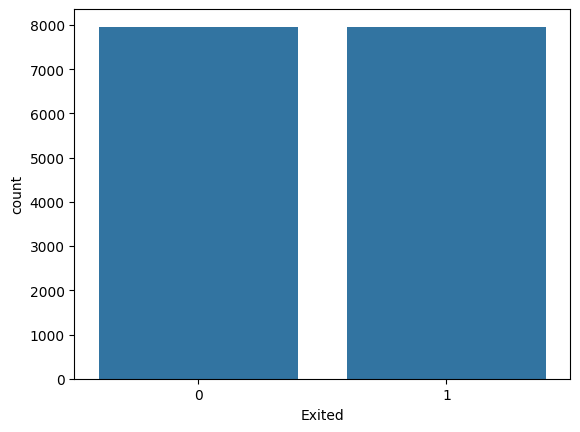

In [22]:
sns.countplot(x=y_res)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.76463487, -0.89325671,  0.79052466, ..., -0.76491752,
         1.58886817, -1.22341837],
       [-0.67674562, -0.79339484,  1.1578305 , ..., -0.76491752,
        -0.62937884,  0.81738187],
       [-1.32099902,  0.20522384,  0.79052466, ..., -0.76491752,
         1.58886817,  0.81738187],
       ...,
       [ 0.13130102,  1.10398066, -0.31139285, ...,  1.30733049,
        -0.62937884,  0.81738187],
       [ 0.48072659, -0.99311857, -1.41331036, ..., -0.76491752,
        -0.62937884,  0.81738187],
       [ 1.6381988 ,  2.2024612 , -1.41331036, ..., -0.76491752,
        -0.62937884, -1.22341837]])

In [40]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred1 = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)



0.7676852239430724

In [41]:

from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, y_pred1)

0.7529896907216495

In [42]:
recall_score(y_test, y_pred1)

0.7813436029097133

In [43]:
f1_score(y_test,y_pred1)

0.7669046619067619

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:

y_pred5=rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8537044788614483

In [48]:

precision_score(y_test, y_pred5)


0.8449873631002527

In [49]:

recall_score(y_test, y_pred5)

0.8583654257595208

In [50]:

f1_score(y_test,y_pred5)

0.8516238590532795

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [53]:

y_pred6=gbc.predict(X_test)

accuracy_score(y_test,y_pred6)

0.8311008790288824

In [54]:

precision_score(y_test,y_pred6)

0.8266438941076003

In [55]:
recall_score(y_test,y_pred6)

0.8284124946512623

In [56]:
f1_score(y_test,y_pred6)

0.8275272494122676